In [6]:
import pandas as pd
import io

# Define the file path
file_path = "/Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/Nek2,3,5,9_test.csv"

# Read the entire CSV file into a string
with open(file_path, 'r') as file:
    data = file.read()

# Split the data by empty lines to separate each block
data_blocks = data.strip().split('\n,,,,,,,,,,\n')

# Process each block separately
for i, block in enumerate(data_blocks):
    # Read the block into a DataFrame
    df = pd.read_csv(io.StringIO(block))
    
    # Determine the base name for the file from the first row
    parts = df['model'].iloc[0].split('_')
    base_name = f"{parts[0]}_{parts[1]}_GP"
    
    # Define the output file path
    output_file_path = f"/Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/{base_name}.csv"
    
    # Save the DataFrame to a CSV file
    df.to_csv(output_file_path, index=False)
    print(f"Saved {base_name} data to {output_file_path}")


Saved NEK2_binding_GP data to /Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/NEK2_binding_GP.csv
Saved NEK2_inhibition_GP data to /Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/NEK2_inhibition_GP.csv
Saved NEK3_binding_GP data to /Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/NEK3_binding_GP.csv
Saved NEK5_binding_GP data to /Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/NEK5_binding_GP.csv
Saved NEK9_binding_GP data to /Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/NEK9_binding_GP.csv
Saved NEK9_inhibition_GP data to /Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/NEK9_inhibition_GP.csv


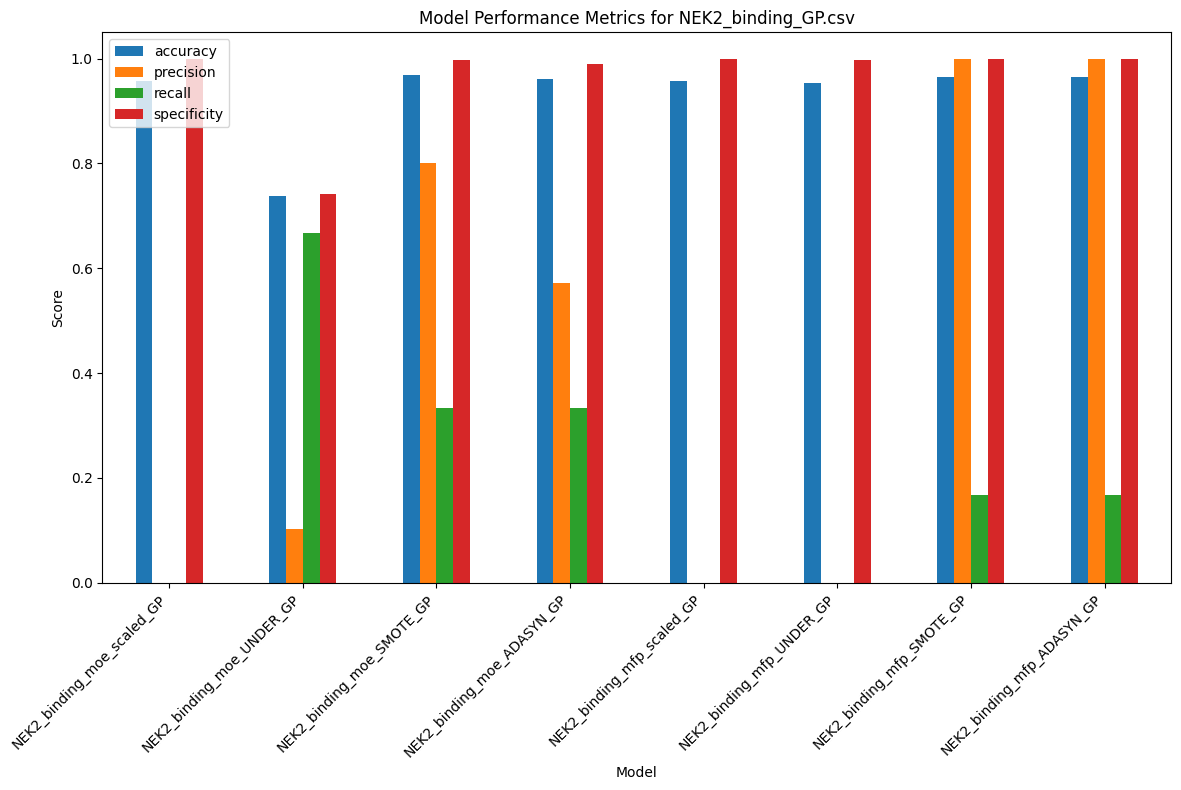

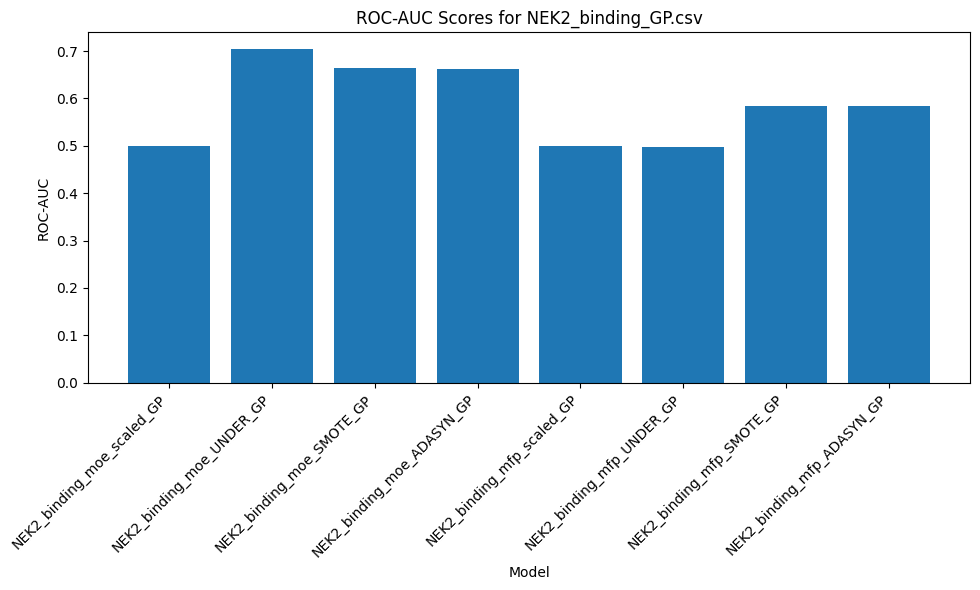

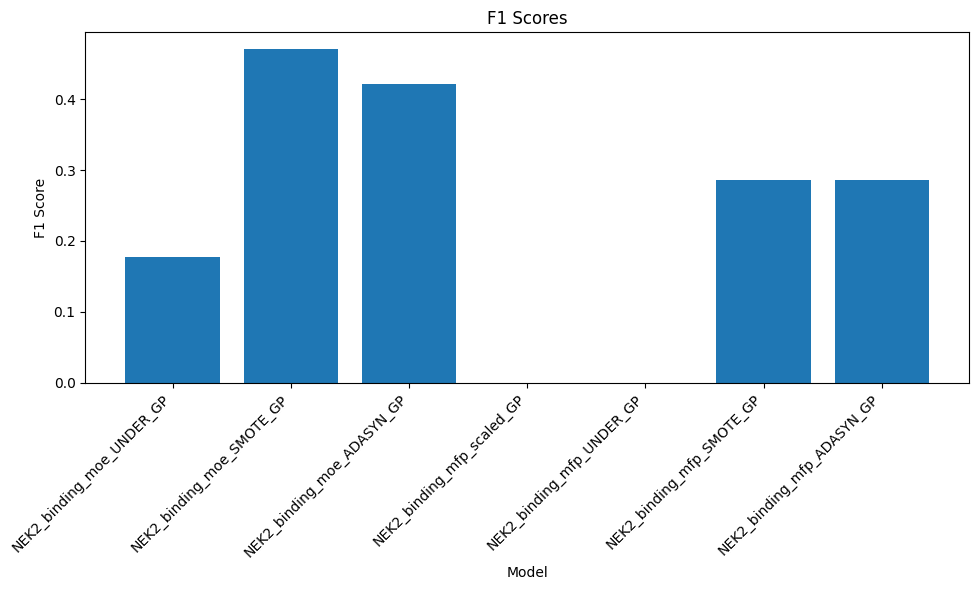

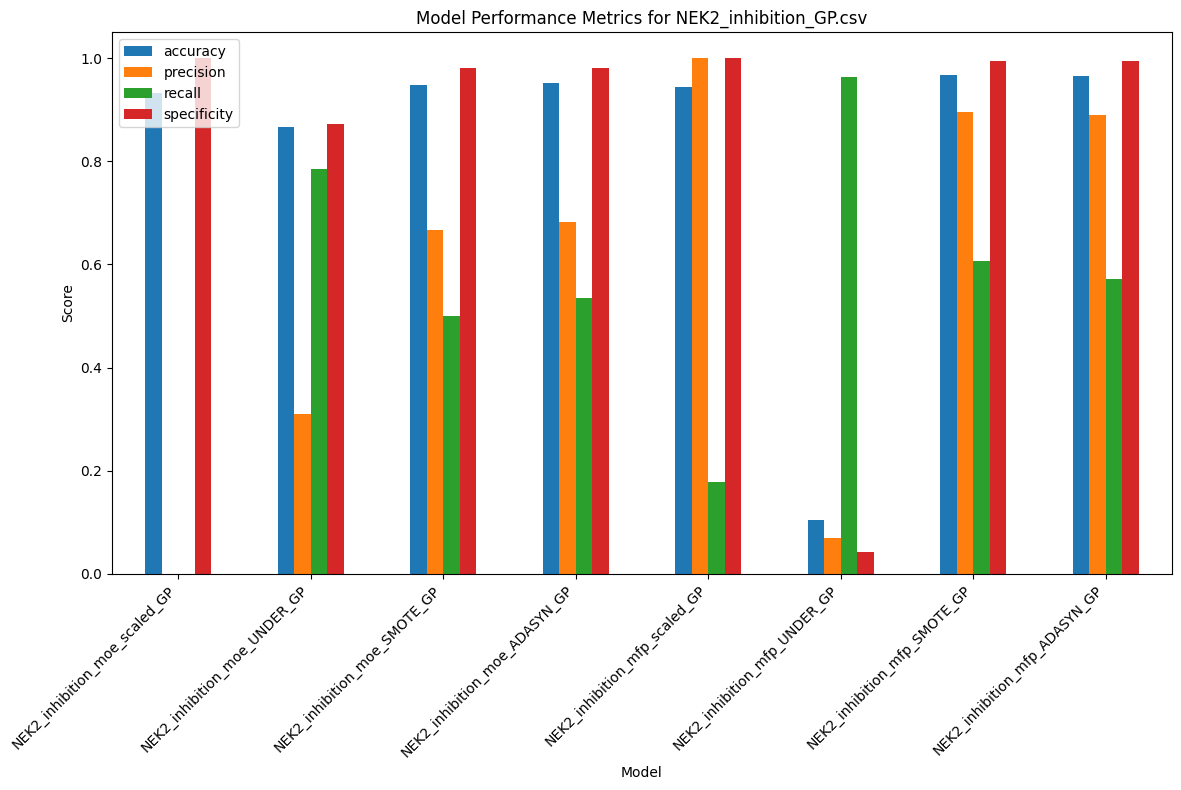

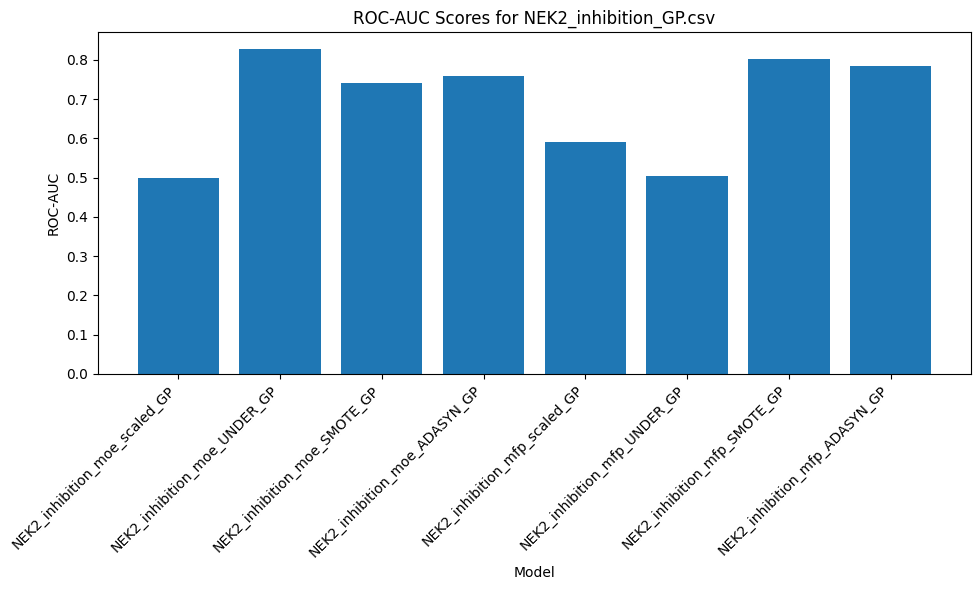

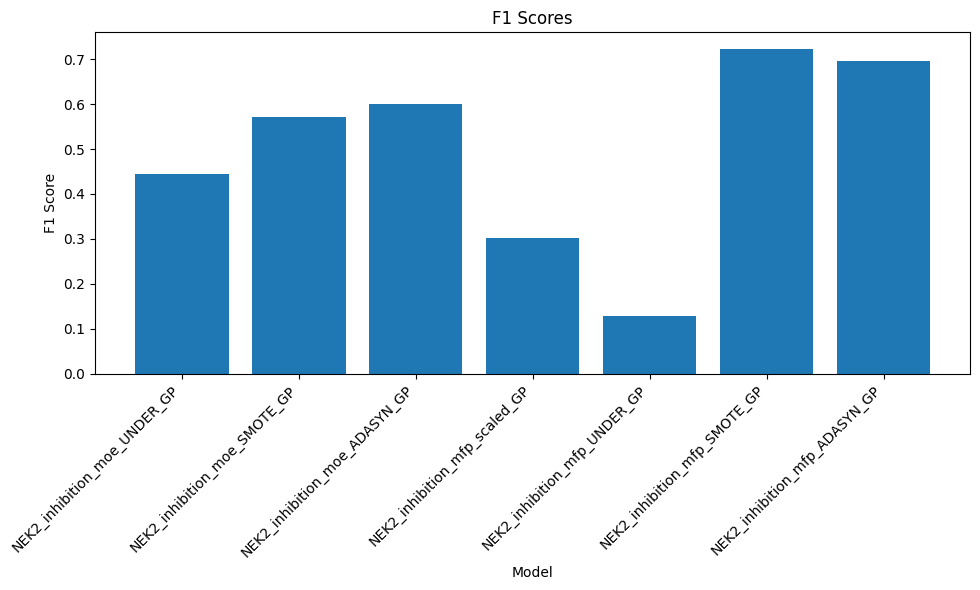

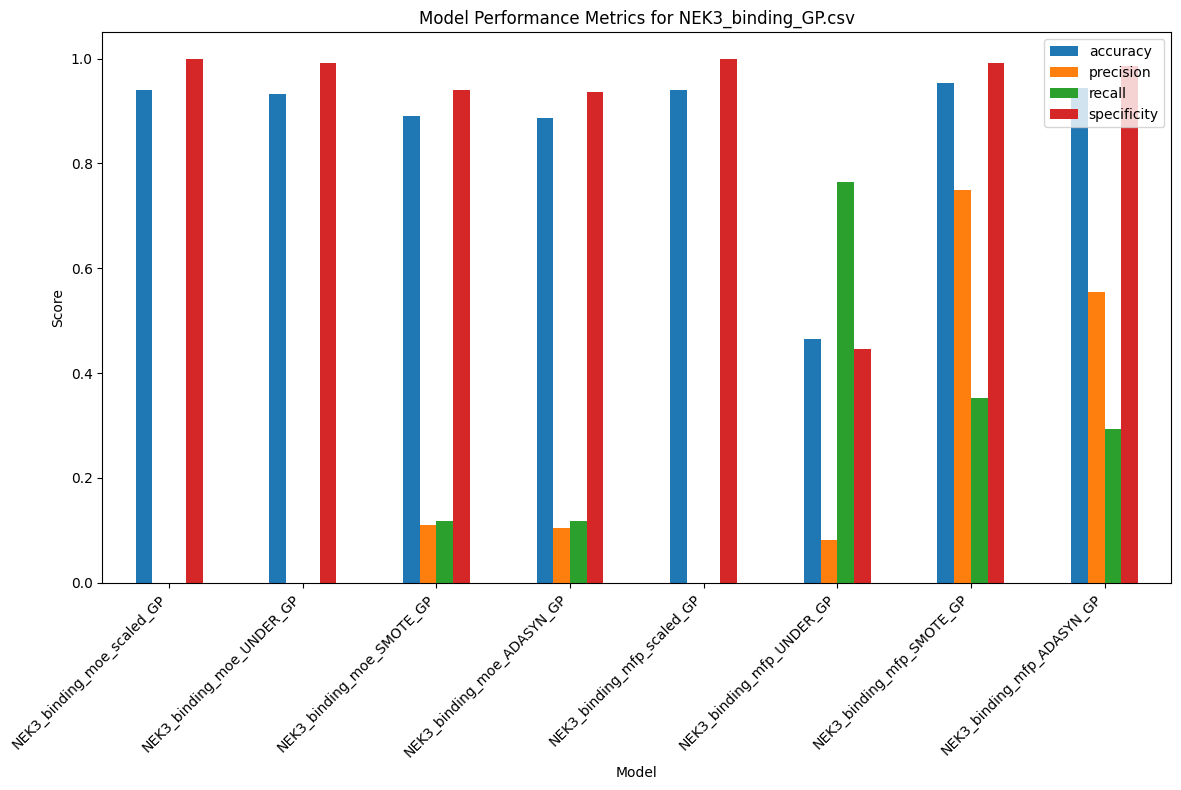

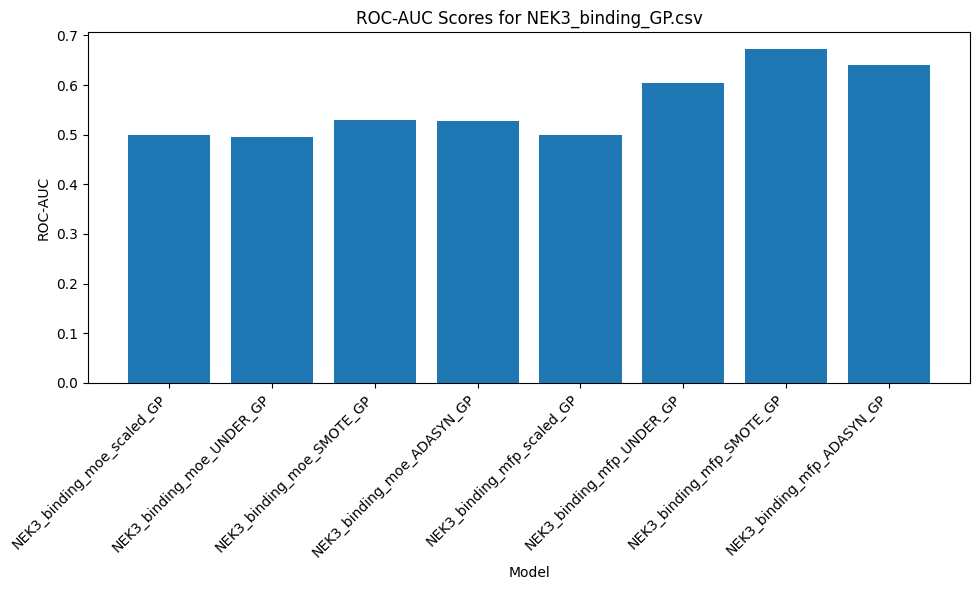

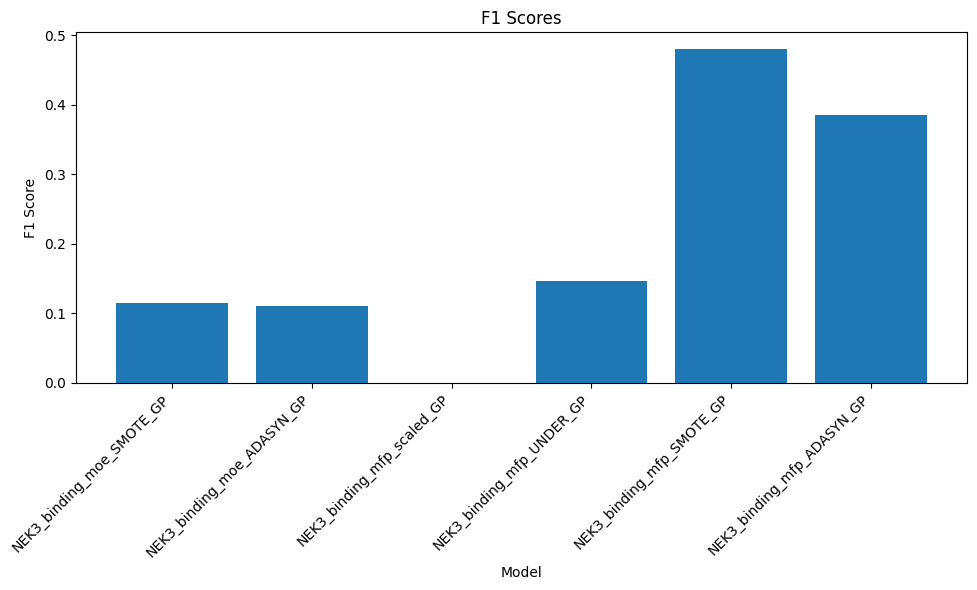

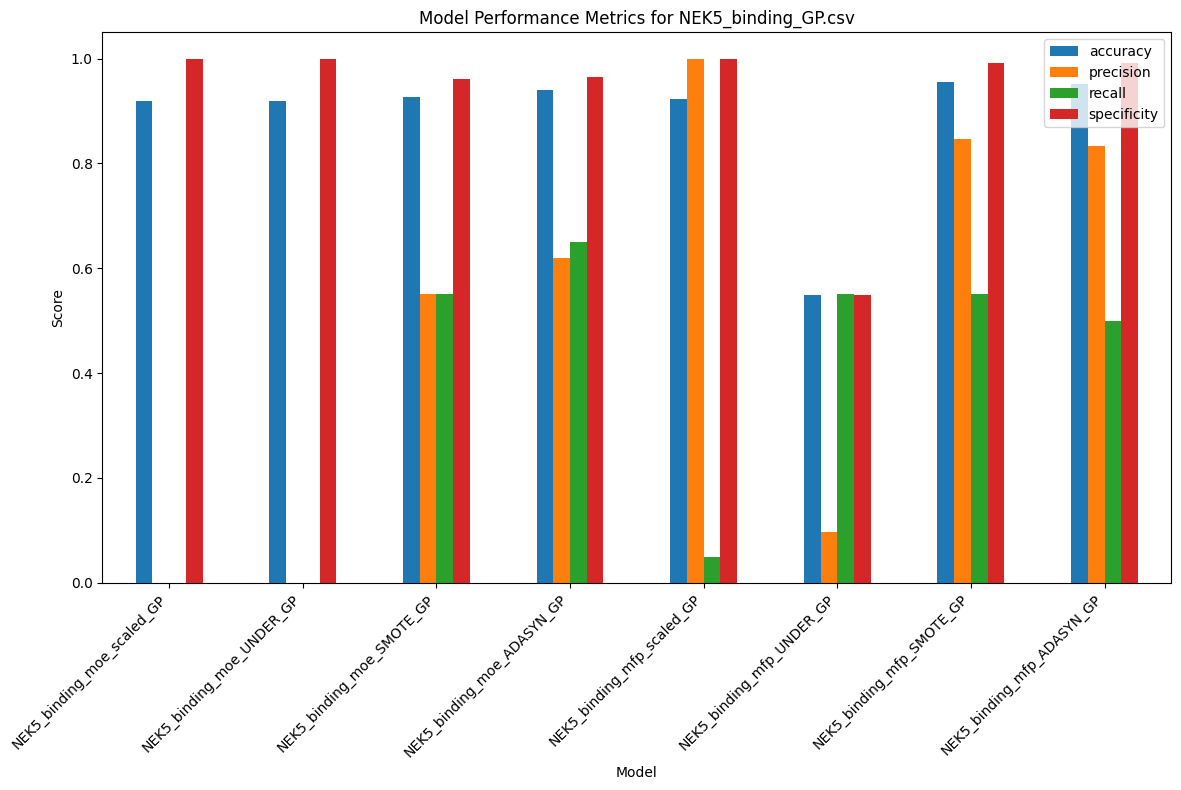

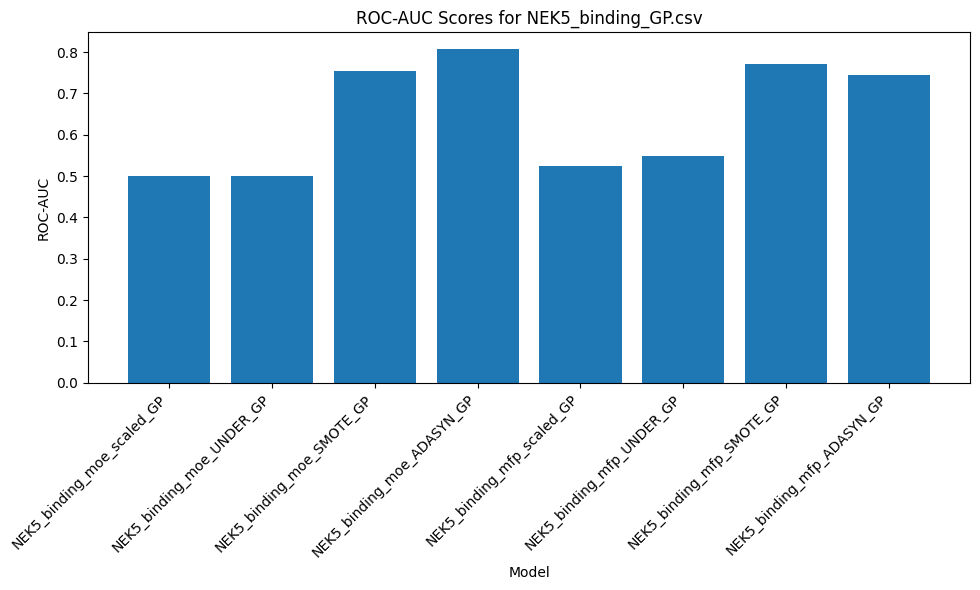

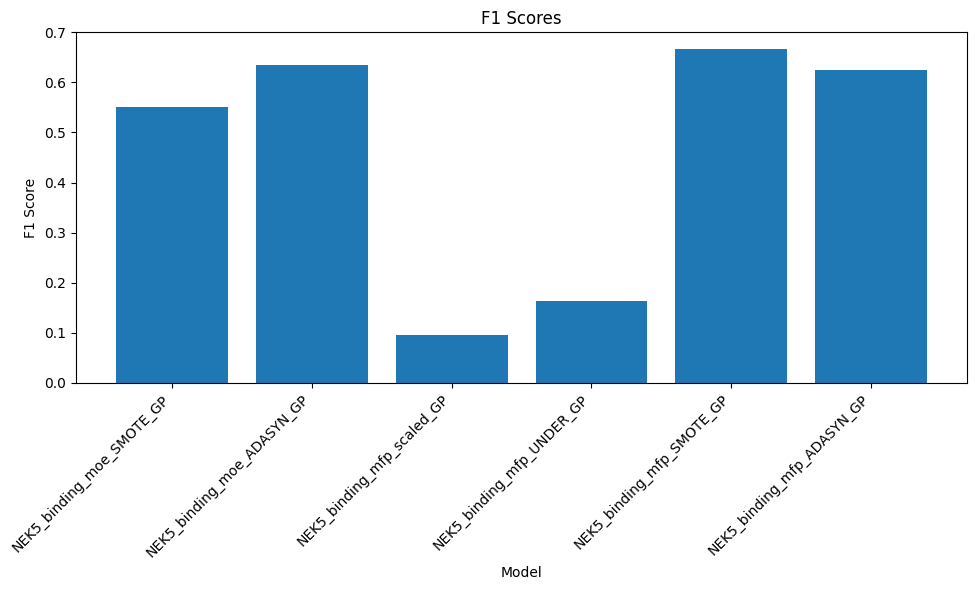

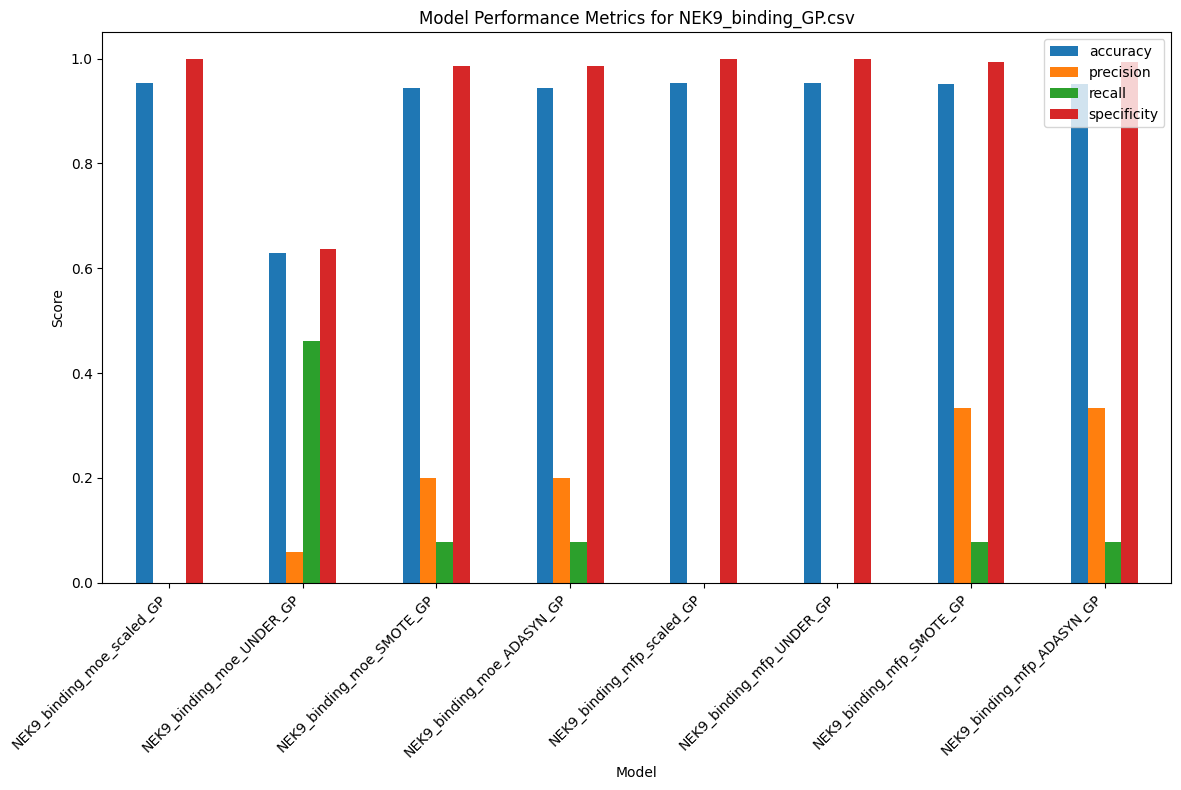

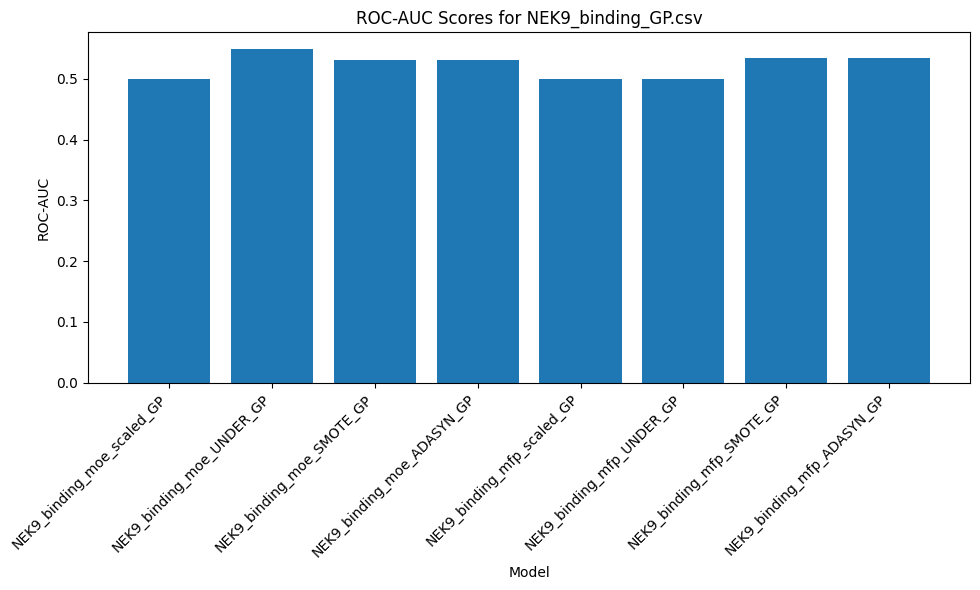

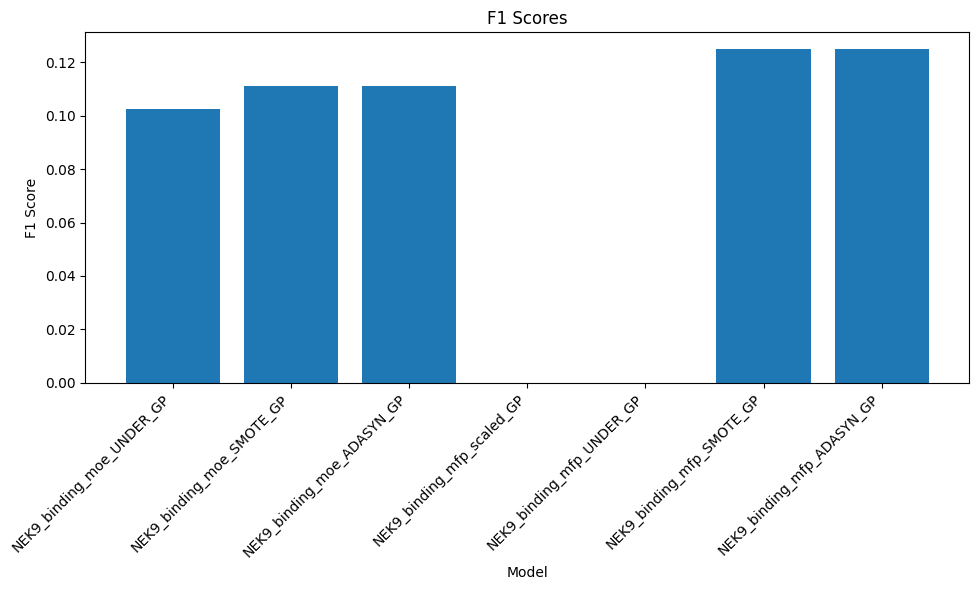

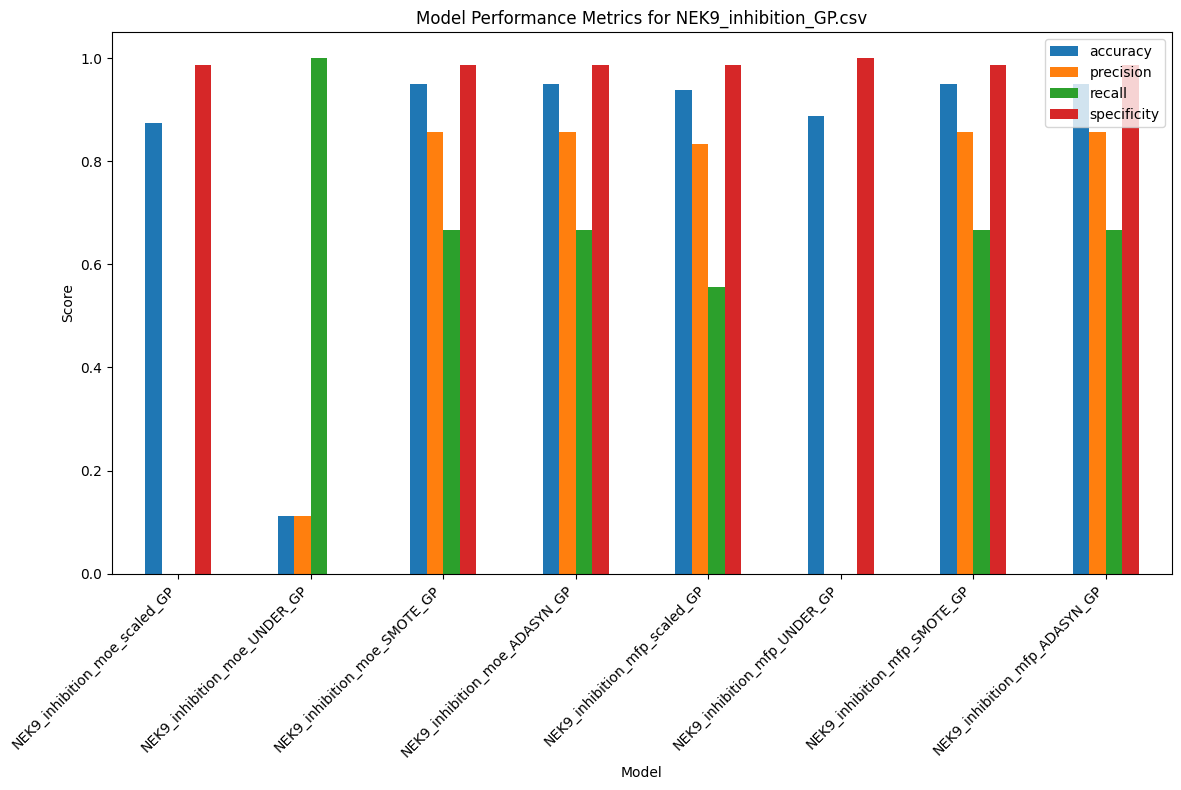

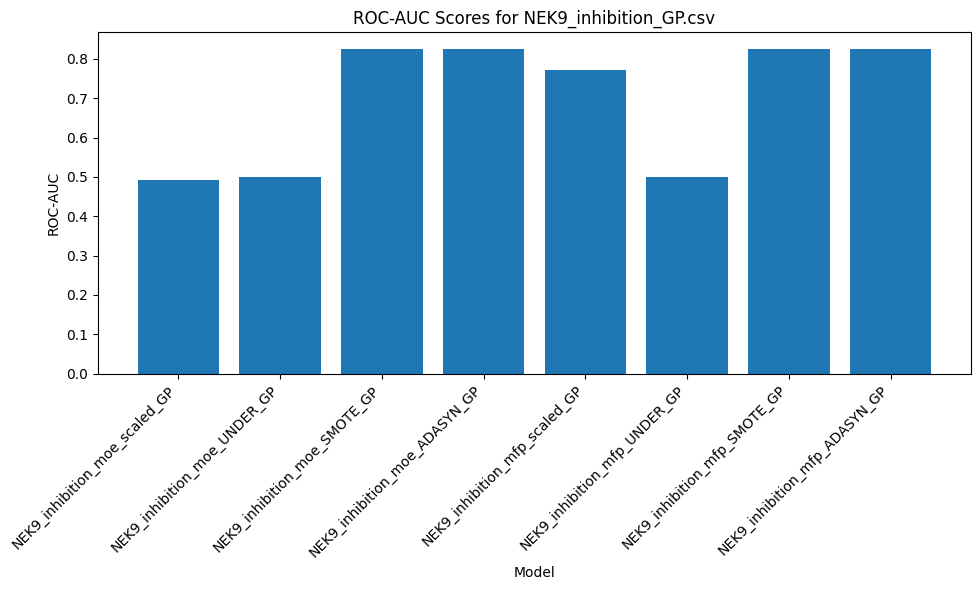

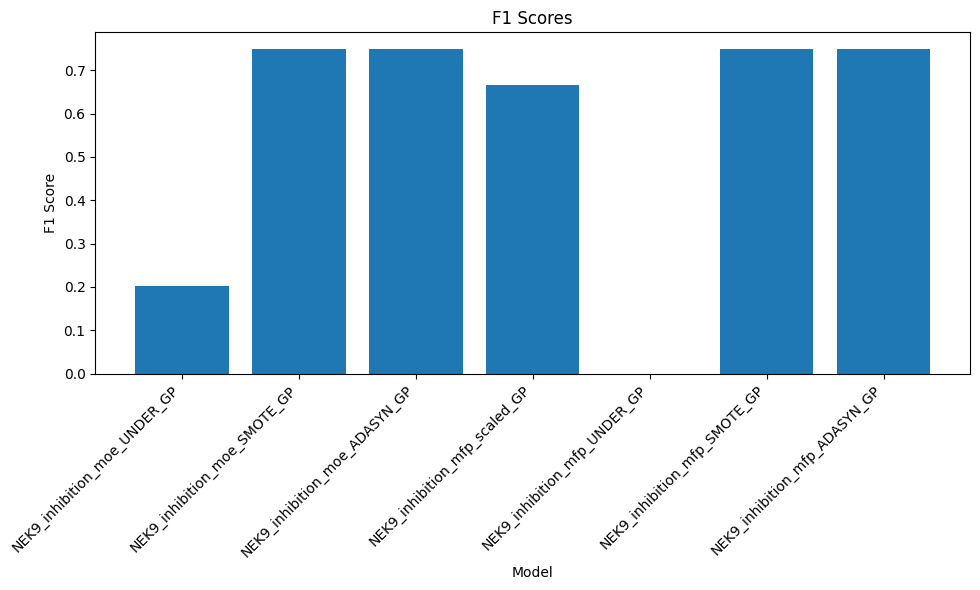

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# List of CSV files
csv_files = [
    "/Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/NEK2_binding_GP.csv",
    "/Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/NEK2_inhibition_GP.csv",
    "/Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/NEK3_binding_GP.csv",
    "/Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/NEK5_binding_GP.csv",
    "/Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/NEK9_binding_GP.csv",
    "/Users/radhi/Desktop/CAPSTONE_DATA/Result_metrics/NEK9_inhibition_GP.csv"
]

for file_path in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Plot Accuracy, Precision, Recall, and Specificity
    metrics = ['accuracy', 'precision', 'recall', 'specificity']
    df[metrics].plot(kind='bar', figsize=(12, 8), title=f'Model Performance Metrics for {file_path.split("/")[-1]}')
    plt.xticks(range(len(df)), df['model'], rotation=45, ha='right')
    plt.ylabel('Score')
    plt.xlabel('Model')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    # Plot ROC-AUC Scores
    plt.figure(figsize=(10, 6))
    plt.bar(df['model'], df['ROC-AUC'])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'ROC-AUC Scores for {file_path.split("/")[-1]}')
    plt.ylabel('ROC-AUC')
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()

    # Calculate F1 score
    df['f1_score'] = 2 * (df['precision'] * df['recall']) / (df['precision'] + df['recall'])

    # Plot F1 Scores
    plt.figure(figsize=(10, 6))
    plt.bar(df['model'], df['f1_score'])
    plt.xticks(rotation=45, ha='right')
    plt.title('F1 Scores')
    plt.ylabel('F1 Score')
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()

    
  